In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv("heart.csv")

In [77]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


%%html
<h1>Data Exploration<h1>
<h1>................<h1>

In [78]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

C:\Users\Manik\AppData\Local\Temp\ipykernel_668\895097478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="mako_r")


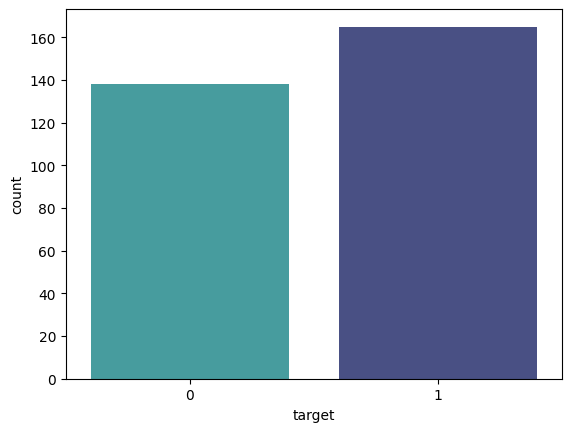

In [79]:
sns.countplot(x="target", data=df, palette="mako_r")
plt.show()

In [80]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients don't have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients have Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients don't have Heart Disease: 45.54%
Percentage of Patients have Disease: 54.46%


C:\Users\Manik\AppData\Local\Temp\ipykernel_668\1879341537.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="mako_r")


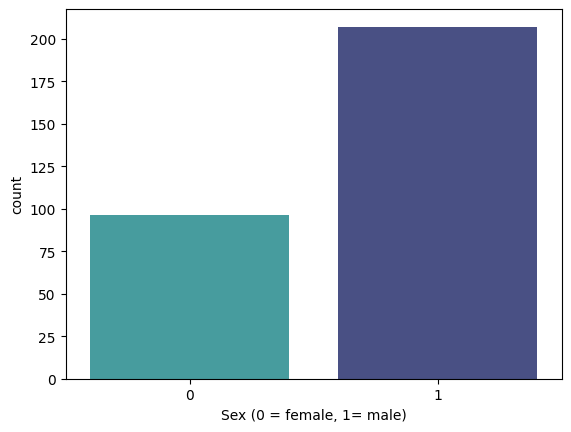

In [81]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [82]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [83]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


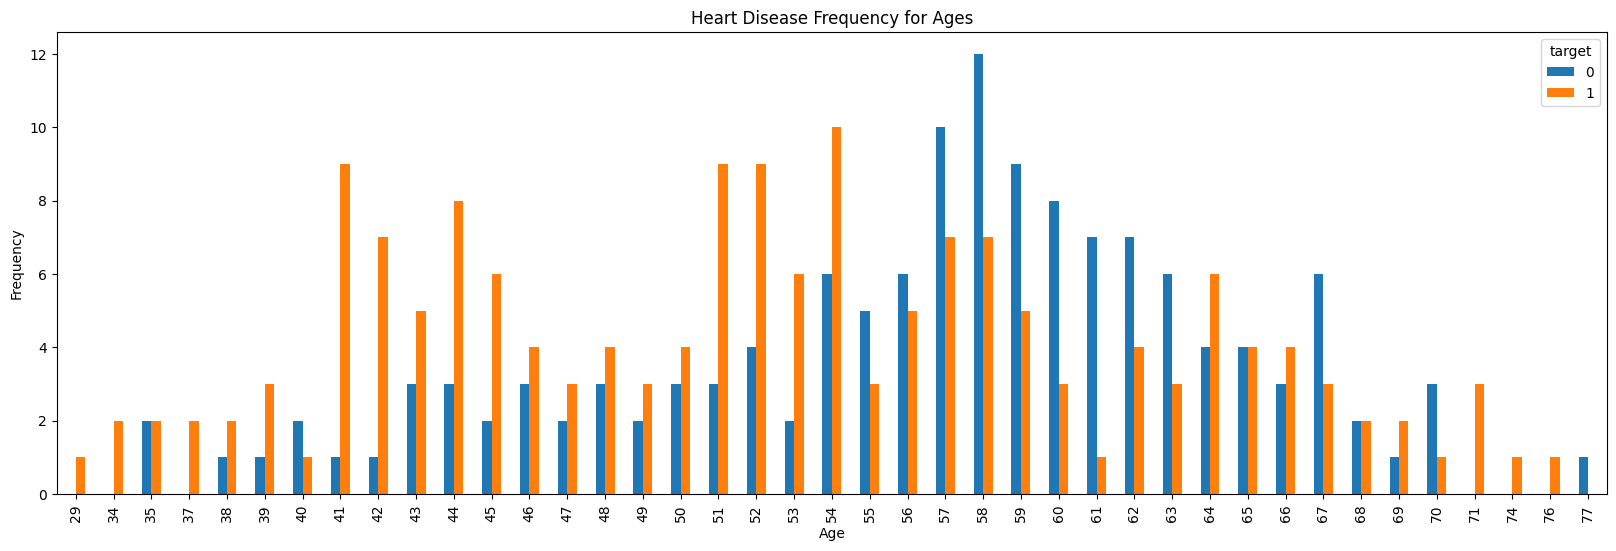

In [84]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

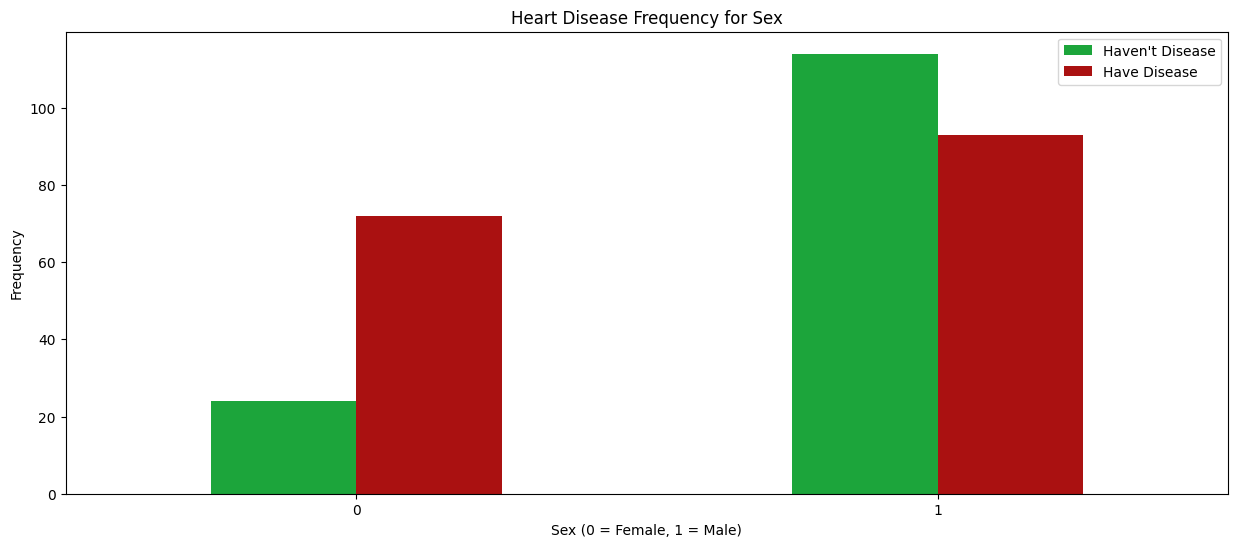

In [85]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

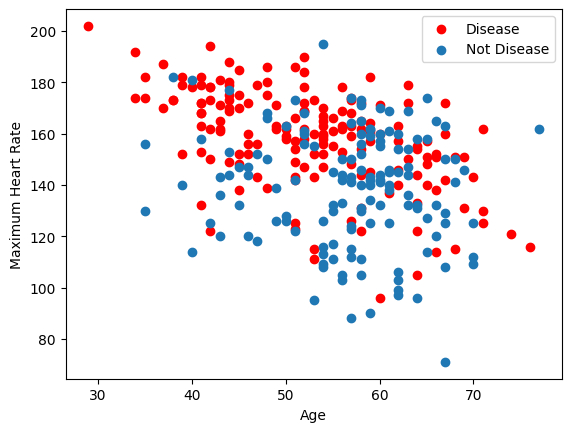

In [86]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

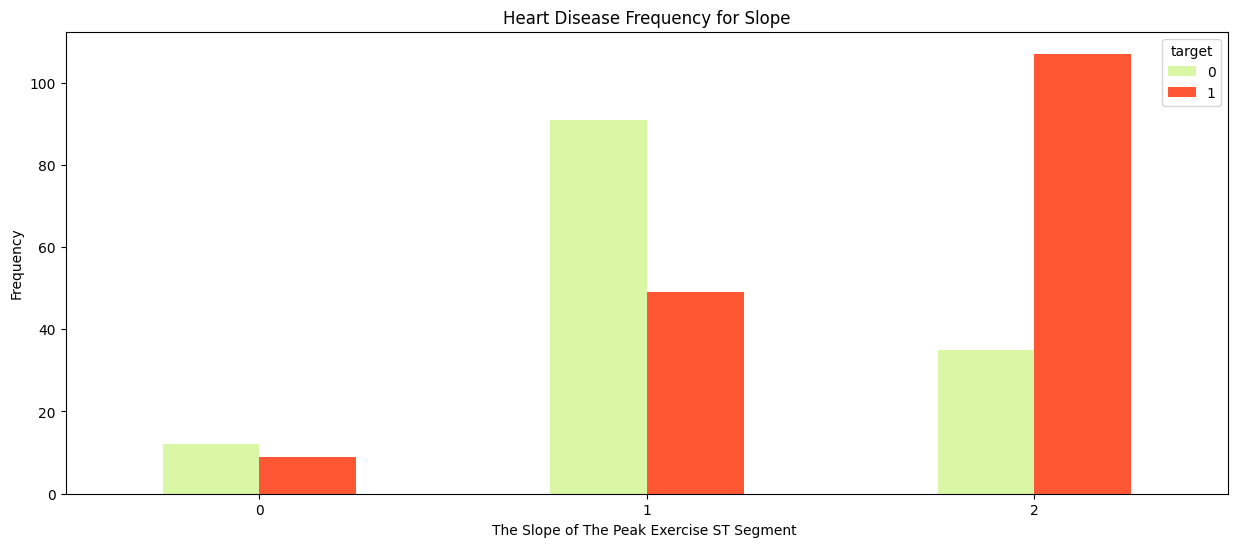

In [87]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

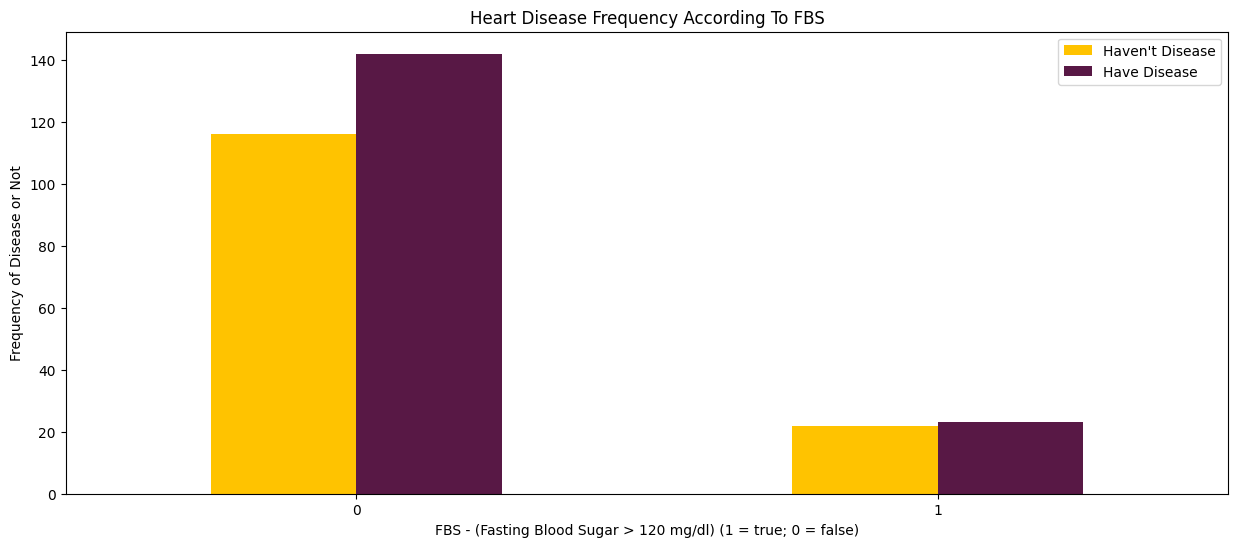

In [88]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

%%html

<h1>Creating Dummy Variables<h1>

<h5>Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.<h5>

In [89]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [90]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [91]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [92]:
%%html
<h1>Naive Bayes Algorithm<h1>

In [93]:
y = df.target.values

In [94]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
x = df.drop(['target'], axis = 1)

In [96]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,False,False,False,False,False,False,True,False,True,False
299,45,1,110,264,0,1,132,0,1.2,0,...,False,False,True,False,False,False,True,False,True,False
300,68,1,144,193,1,1,141,0,3.4,2,...,False,False,False,False,False,False,True,False,True,False
301,57,1,130,131,0,1,115,1,1.2,1,...,False,False,False,False,False,False,True,False,True,False


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [98]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
nb = GaussianNB()

In [101]:
nb.fit(x_train.T, y_train.T)

GaussianNB()

In [102]:
acc = nb.score(x_test.T,y_test.T)*100

In [103]:
accuracies = {}
accuracies

{}

In [104]:
accuracies['Naive Bayes'] = acc

In [105]:
accuracies

{'Naive Bayes': 86.88524590163934}

In [106]:
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
y_head_nb = nb.predict(x_test.T)

In [109]:
cm_nb = confusion_matrix(y_test,y_head_nb)

<Axes: title={'center': 'Naive Bayes Confusion Matrix'}>

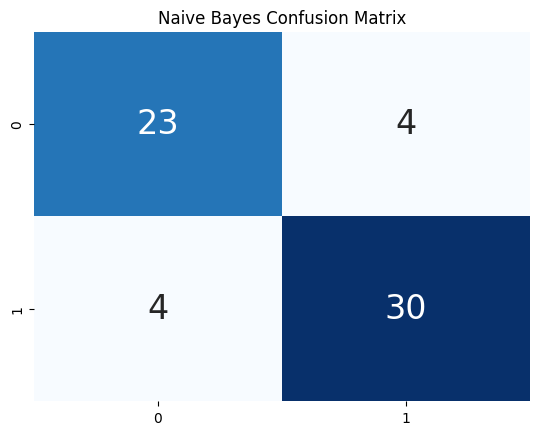

In [110]:
plt.plot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

<h1>Logistic Regression</h1>

In [111]:
from sklearn.linear_model import LogisticRegression

In [115]:
classifier = LogisticRegression()

In [118]:
classifier.fit(x_train.T,y_train.T)

c:\Users\Manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [121]:
y_pred = classifier.predict(x_test.T)

In [123]:
accuracy = accuracy_score(y_test.T,y_pred)*100
print(f'accuracy:{accuracy}')

cl_report=(y_test.T,y_pred)
print('classification_report:')
print(cl_report)

accuracy:85.24590163934425
classification_report:
(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64), array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64))


In [124]:
print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy))

Accuracy of Logistic Regression: 85.25%


In [125]:
y_head_lr = classifier.predict(x_test.T)

In [126]:
cm_lr = confusion_matrix(y_test,y_head_lr)

<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

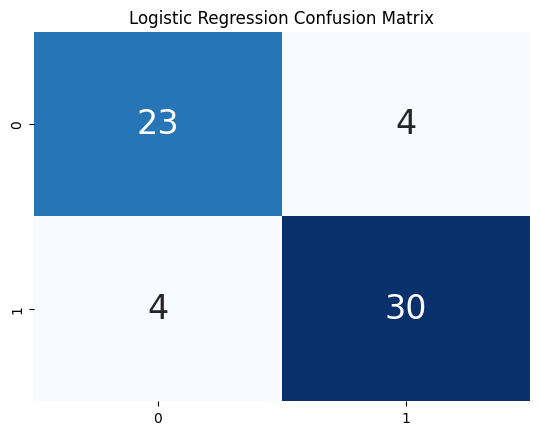

In [127]:
plt.plot(2,3,4)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})